

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 5)                 40        
                                                                 
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 2)                 12        
                                                                 
Total params: 112 (448.00 Byte)
Trainable params: 112 (448.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100


2/2 [==============================] - 1s 284ms/step - loss: 0.2806 - mae: 0.2806 - val_loss: 0.3443 - val_mae: 0.3443
Epoch 2/100
2/2

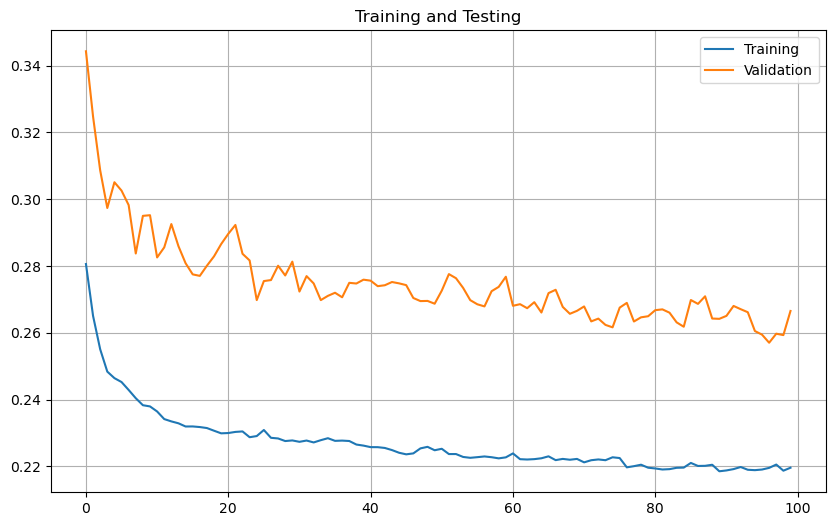

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Function of Two Variables
def func(x):
    y = np.cos(x[0]) / x[1] - np.sin(x[0]) / x[1]**2
    z = np.sin(x[0] / 2) + y * np.sin(x[0])
    return y, z

# Collecting Dataset
x = np.linspace(12, 19, 7)
x0, x1 = np.meshgrid(x, x)
x0, x1 = x0.ravel(), x1.ravel()
X = [[x0[i], x1[i]] for i in range(len(x0))]
y, z = zip(*[func(x) for x in X])

split = int(len(X) * 0.8)
x_train, y_train, z_train = X[:split], y[:split], z[:split]
x_test, y_test, z_test = X[split:], y[split:], z[split:]

# Function to display
def visual(his):
    loss = his.history['loss']
    val_loss = his.history['val_loss']
    epochs = range(len(loss))
    
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss, label='Training')
    plt.plot(epochs, val_loss, label='Validation')
    plt.title('Training and Testing')
    plt.legend()
    plt.grid()
    plt.show()

# Model with 3 inner layers and 5 neurons each for Elman backprop
model_elman2 = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(5, activation='relu', input_shape=(1, 2)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(2)  # Two outputs for y and z
])

model_elman2.summary()

x_train = np.reshape(x_train, (np.shape(x_train)[0], 1, np.shape(x_train)[1]))
x_test = np.reshape(x_test, (np.shape(x_test)[0], 1, np.shape(x_test)[1]))

model_elman2.compile(
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(0.001, decay_steps=75, decay_rate=0.96)
    ),
    loss='mae',
    metrics=['mae']
)

# Train the model
history_elman2 = model_elman2.fit(
    x_train, np.array([y_train, z_train]).T,  # Two outputs
    epochs=100,
    validation_data=(x_test, np.array([y_test, z_test]).T),
)

# Display learning curves
visual(history_elman2)
